In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2,6,1/15/2019,0.0
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4,4,1/17/2019,0.0
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5,5,1/18/2019,0.0
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3,4,NaN,NaN
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3,5,1/15/2019,0.0


<Axes: >

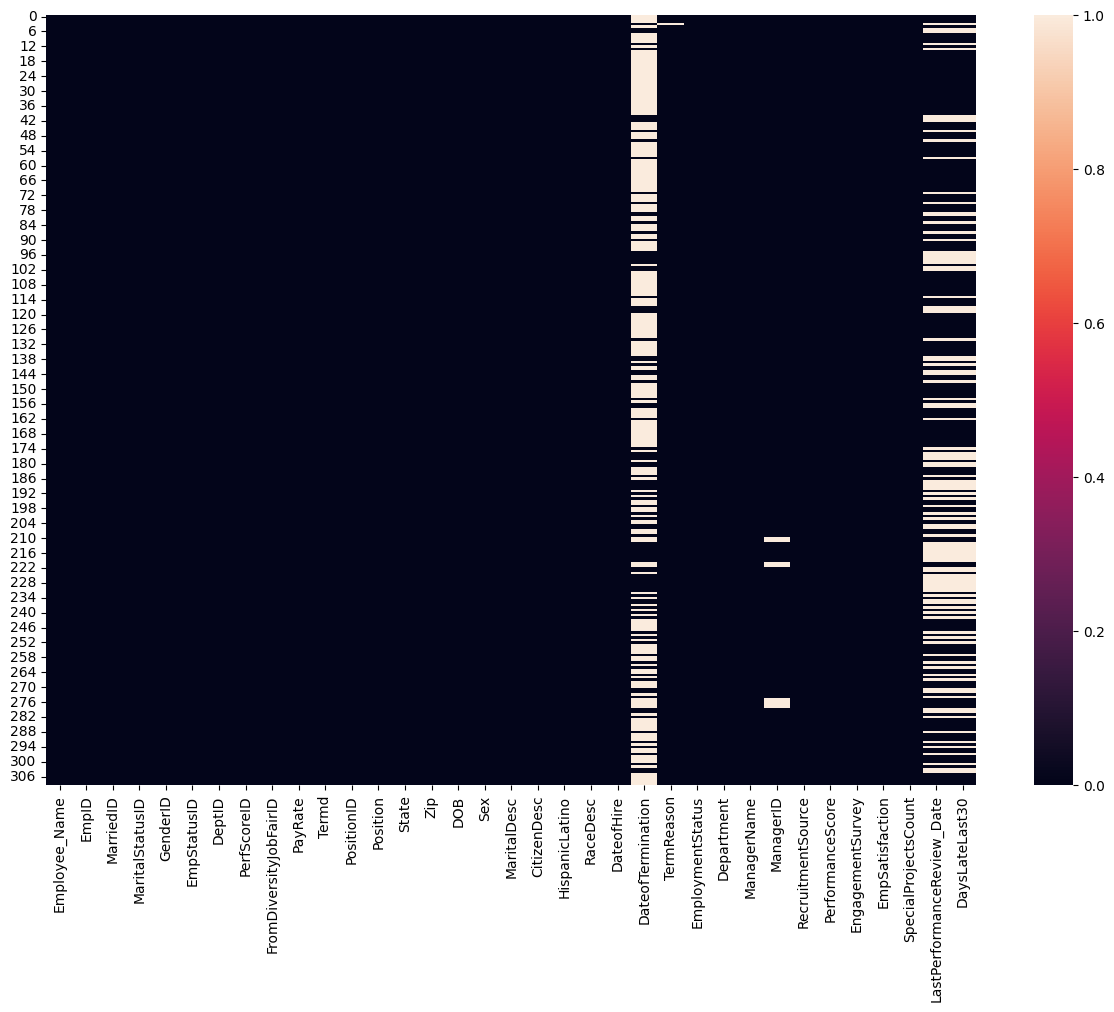

In [2]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [3]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [4]:
df.dropna(thresh=2,inplace=True)

In [5]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [6]:
df['DOB'] = pd.to_datetime(df['DOB'],dayfirst=True)
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],dayfirst=True)
df['DateofHire'] = pd.to_datetime(df['DateofHire'],dayfirst=True)
df[['DateofTermination','DOB','DateofHire']].head()

C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_3464\3978346008.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'],dayfirst=True)
C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_3464\3978346008.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],dayfirst=True)
C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_3464\3978346008.py:3: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['DateofHire'] = pd.to_datetime(df['DateofHire'],dayfirst=True)


,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-01-09,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_3464\3289627502.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PayRate'])


<Axes: xlabel='PayRate', ylabel='Density'>

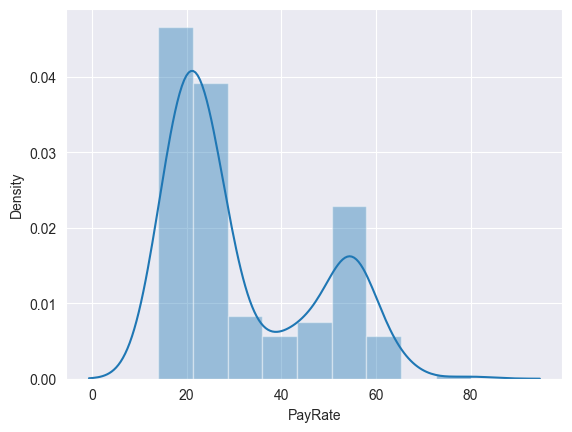

In [7]:
sns.set_style('darkgrid')
sns.distplot(df['PayRate'])

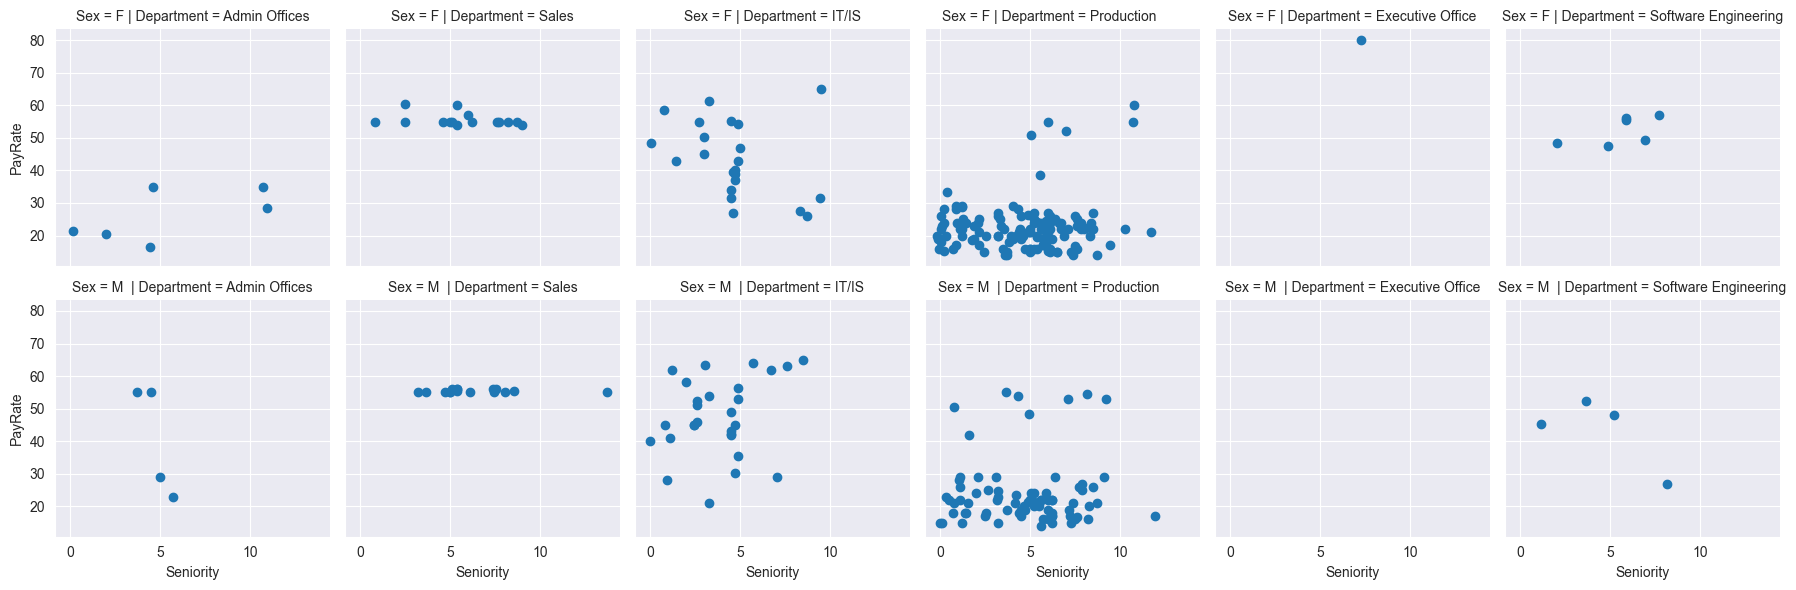

In [16]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(365,'D')
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)    
g = sns.FacetGrid(data=df,col='Department',row='Sex')
g.map(plt.scatter,'Seniority','PayRate')

In [20]:
df[["ManagerName","ManagerID","PerformanceScore"]].sample(10)

,ManagerName,ManagerID,PerformanceScore
128,David Stanley,14.0,Fully Meets
35,Brian Champaigne,13.0,Fully Meets
196,Michael Albert,22.0,Fully Meets
191,Kissy Sullivan,20.0,Fully Meets
186,Kissy Sullivan,20.0,Fully Meets
31,Lynn Daneault,21.0,Exceeds
44,Simon Roup,4.0,Fully Meets
153,Kelley Spirea,18.0,Fully Meets
135,Elijiah Gray,16.0,Fully Meets
289,Alex Sweetwater,10.0,Fully Meets


In [26]:
pd.crosstab(df['ManagerName'],df['PerformanceScore'])

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


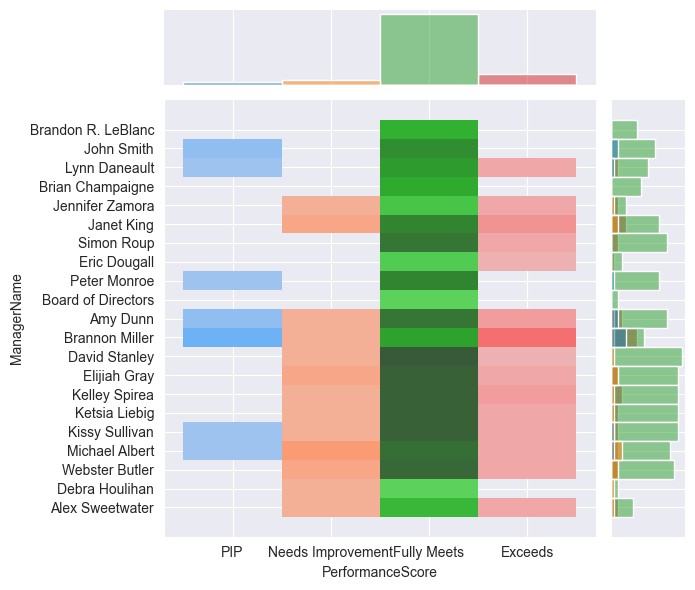

In [61]:
df["PerformanceScore"] = pd.Categorical(df["PerformanceScore"],["PIP","Needs Improvement","Fully Meets","Exceeds"])
sns.jointplot(x='PerformanceScore',y='ManagerName',data=df,kind='hist',hue="PerformanceScore",legend=False)

From this joint grid we can see some Managers have individuals with good performance scores and some with worse, but overall each manager has at least 1 employee in the "Fully Meets" performance score rating and there doesn't appear to be clear correlation to if an individual's performance score matters depending on which manager.

<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

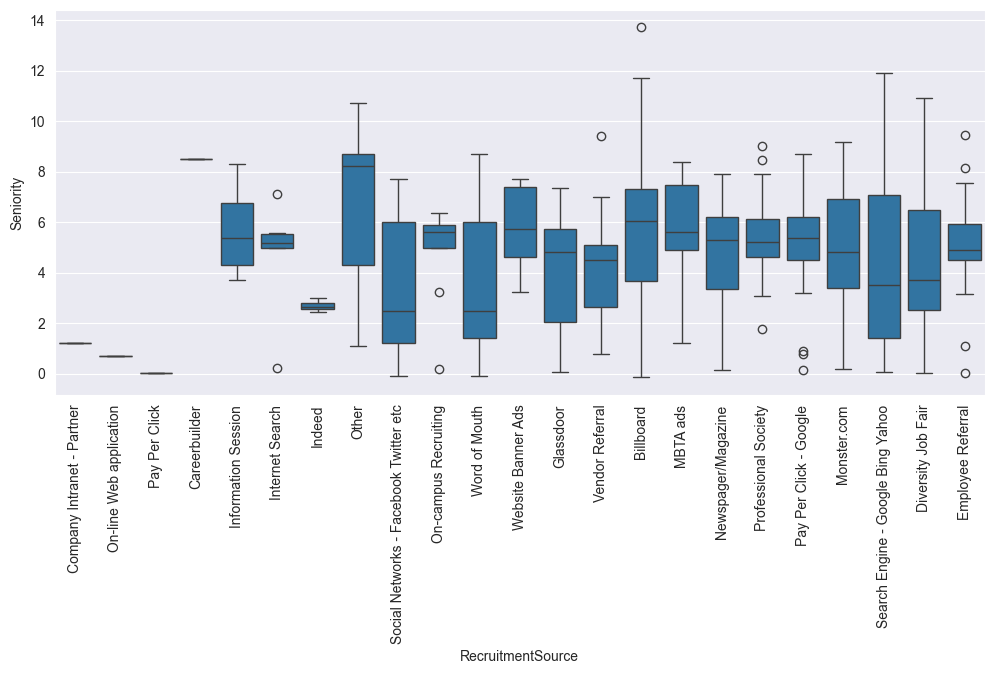

In [79]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
s = df["RecruitmentSource"].value_counts(ascending=True)
sns.boxplot(x='RecruitmentSource',y='Seniority',data=df,order=s.index)

I have sorted the recruitment sources by popularity, with Employee Referral being the most common form of recruitment. From this data we can see that the Billboard source contains the most senior employee and overall has a high range and median of seniority however the Other method does contain the highest median of all methods but is also fairly low down on the popularity end so may not be as reliable when extrapolated over a larger set of employees.

In [83]:
pd.crosstab(df['MaritalDesc'],df['EmpSatisfaction'])

EmpSatisfaction,1,2,3,4,5
MaritalDesc,,,,,
Divorced,0,1,6,14,9
Married,0,5,54,31,33
Separated,1,0,4,2,5
Single,1,3,44,40,49
Widowed,0,0,0,6,2


<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

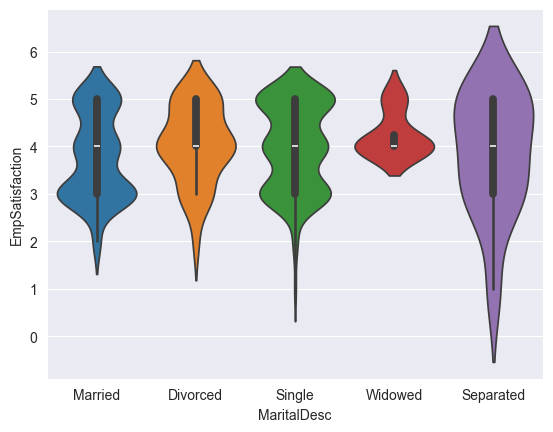

In [82]:
sns.violinplot(x='MaritalDesc',y='EmpSatisfaction',data=df,hue="MaritalDesc")

From this data on employee marital status and satisfaction we can see that Seperated employees have the greatest range of satisfaction being both the least and most satisfied, however the Single group contains the most people with a 5/5 satisfaction rating while also being the most populous group. It is hard to say if there is much correlation to satisfaction and marital status from this data alone as there are many other factors to take into account for employee satisfaction.

In [251]:
def age(row):
    if pd.isnull(row['DateofTermination']):
        if pd.to_datetime(row['DOB']) > dt.datetime(2024,4,18):
            age = dt.datetime(2124,4,18) - row['DOB']
        else:
            age = dt.datetime(2024,4,18) - row['DOB']
    else:
        return(0)
    return(age/np.timedelta64(365,'D'))    
df["Age"]= df.apply(lambda row: age(row),axis=1)
df= df[df['Age'] != 0]
df[["Employee_Name","Age","DOB"]].head(10)

,Employee_Name,Age,DOB
0,"Brown, Mia",36.424658,1987-11-24
1,"LaRotonda, William",40.005479,1984-04-26
2,"Steans, Tyrone",38.298630,1986-01-09
4,"Singh, Nan",35.939726,1988-05-19
7,"Carter, Michelle",60.967123,2063-05-15
8,"Dietrich, Jenna",36.956164,1987-05-14
9,"Digitale, Alfred",35.616438,1988-09-14
10,"Friedman, Gerry",55.180822,2069-02-24
12,"Gonzales, Ricardo",69.402740,1954-12-10
14,"Leruth, Giovanni",35.331507,1988-12-27


In [139]:
print(df['Age'].max())
print(df['Age'].min())

73.26027397260275
31.69041095890411


<Axes: xlabel='Age', ylabel='Count'>

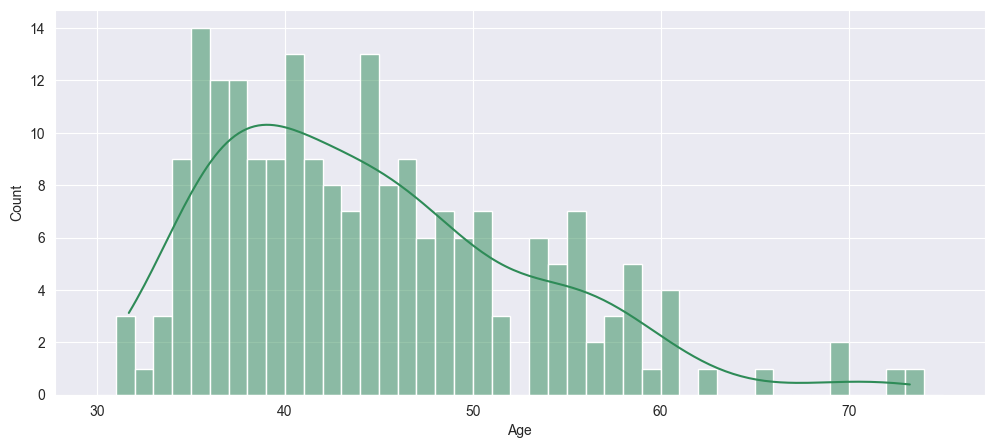

In [249]:
plt.figure(figsize=(12,5))
ax = sns.histplot(df['Age'],kde=True,bins=45,binrange=(30,75),color="seagreen")
ax

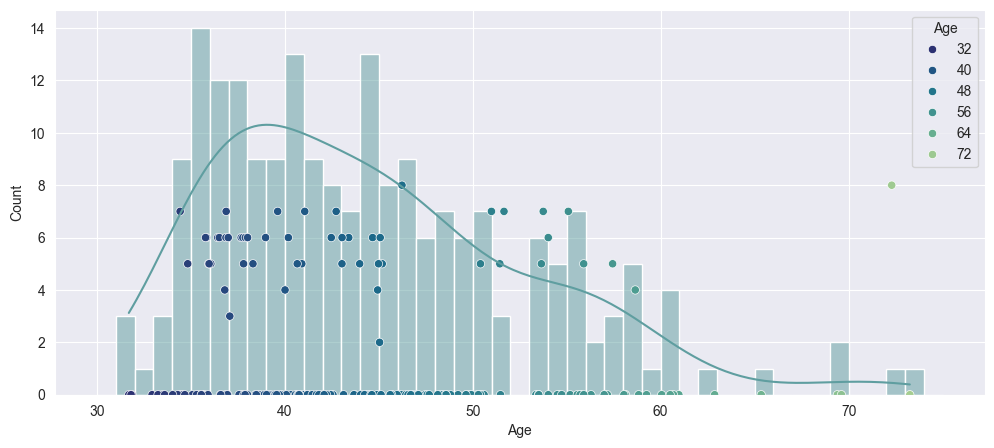

In [215]:
plt.figure(figsize=(12,5))
ax = sns.histplot(df['Age'],kde=True,bins=45,binrange=(30,75),color="cadetblue")
sns.scatterplot(data=df,x="Age",y="SpecialProjectsCount",ax=ax,marker="X",hue="Age",palette="crest_r")
plt.show()

In [246]:
p = df[["SpecialProjectsCount","EmpID"]].groupby(pd.cut(df['Age'], [30,35,40,45,50,55,60,65,70,75]))["SpecialProjectsCount"].sum()
p2 = df[["SpecialProjectsCount","EmpID"]].groupby(pd.cut(df['Age'], [30,35,40,45,50,55,60,65,70,75]))["EmpID"].count()
projects = p.to_frame().join(p2)
projects["ProjectPerPerson"] = projects["SpecialProjectsCount"]/projects["EmpID"]
projects

C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_3464\1818598336.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p = df[["SpecialProjectsCount","EmpID"]].groupby(pd.cut(df['Age'], [30,35,40,45,50,55,60,65,70,75]))["SpecialProjectsCount"].sum()
C:\Users\Michal Krzyzanowski\AppData\Local\Temp\ipykernel_3464\1818598336.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p2 = df[["SpecialProjectsCount","EmpID"]].groupby(pd.cut(df['Age'], [30,35,40,45,50,55,60,65,70,75]))["EmpID"].count()


,SpecialProjectsCount,EmpID,ProjectPerPerson
Age,,,
"(30, 35]",12,16,0.750000
"(35, 40]",118,56,2.107143
"(40, 45]",77,50,1.540000
"(45, 50]",21,36,0.583333
"(50, 55]",42,21,2.000000
"(55, 60]",21,18,1.166667
"(60, 65]",0,5,0.000000
"(65, 70]",0,3,0.000000
"(70, 75]",8,2,4.000000


<Axes: xlabel='Age', ylabel='ProjectPerPerson'>

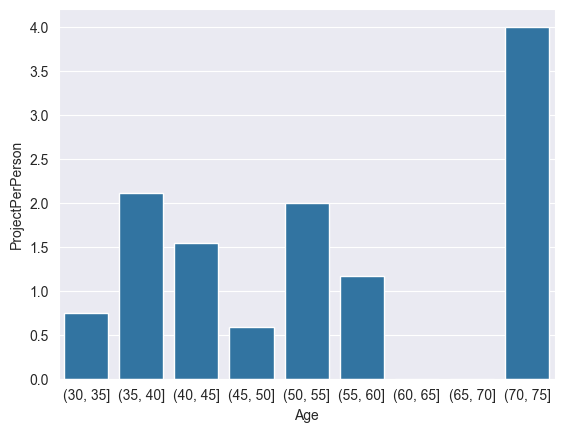

In [247]:
sns.barplot(x='Age',y='ProjectPerPerson',data=projects)

By dividing up the employees into age groups from 30-75 in 5 year increments and taking the average of special projects per person, we see that overall younger employees do have more special projects than older ones as the 70-75 group is only represented by 2 people, one of which has 8 special projects and could be considered an anomaly. This data isn't as reliable for the older groups as they have less employees than the younger groups and require more extrapolation to achieve similar ProjectPerPerson values.